<a href="https://colab.research.google.com/github/AlfredoFarro/TF-201911924/blob/main/Hito1/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')
!wget -O Lima-intersecciones.csv https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-intersecciones.csv
!wget -O Lima-calles.csv https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-calles.csv

--2022-06-18 22:18:03--  https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-intersecciones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12107428 (12M) [text/plain]
Saving to: ‘Lima-intersecciones.csv’

Lima-intersecciones 100%[===================>]  11.55M  --.-KB/s    in 0.1s    

2022-06-18 22:18:03 (114 MB/s) - ‘Lima-intersecciones.csv’ saved [12107428/12107428]

--2022-06-18 22:18:03--  https://raw.githubusercontent.com/AlfredoFarro/TF-201911924/main/Data/Lima-calles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
import pandas as pd
import json

calles = pd.read_csv("Lima-calles.csv",encoding='latin-1')

inter= pd.read_csv("Lima-intersecciones.csv",encoding='latin-1')#.iloc[0:10]
inter

Item   ID_Calle       Nombre_Calle  ID_Calle_Origen  ID_Calle_Final  \
0           1    4827820    Plaza 2 de Mayo         31035122        31035142   
1           2    4827820    Plaza 2 de Mayo         31035142        31035109   
2           3    4827820    Plaza 2 de Mayo         31035109        31035110   
3           4    4827820    Plaza 2 de Mayo         31035110        31035112   
4           5    4827820    Plaza 2 de Mayo         31035112        31035113   
...       ...        ...                ...              ...             ...   
84668  146468  248759468         La Florida       1756333184      2554985990   
84669  146469  248759468         La Florida       2554985990      2554988470   
84670  146470  248760457  Calle Santa Maria       1273842906      1756333189   
84671  146471  248760457  Calle Santa Maria       1756333189      1273978310   
84672  146472  250030066             calle1       2565524599      2565524598   

       ID_Origen_intereccion  ID_Final_Interseccion  distancia_Km  velocidad  \
0                          1                      6      0.038973         70   
1                          6                  90275      0.004040         70   
2                      90275                     79      0.018227         70   
3                         79                  51668      0.037674         70   
4                      51668                      7      0.010827         70   
...                      ...                    ...           ...        ...   
84668                  96505                  43124      0.124055         40   
84669                  43124                  96506      0.083888         40   
84670                  43223                  78495      0.023016         40   
84671                  78495                  96507      0.047110         40   
84672                  96508                  96509      0.167513         40   

         Costo1          Costo2  Latitud_Origen_Interseccion  \
0      0.000557  1000000.000000                   -12.045931   
1      0.000058  1000000.000000                   -12.046096   
2      0.000260  1000000.000000                   -12.046125   
3      0.000538  1000000.000000                   -12.046277   
4      0.000155  1000000.000000                   -12.046603   
...         ...             ...                          ...   
84668  0.003101        0.003101                   -11.767173   
84669  0.002097        0.002097                   -11.768156   
84670  0.000575        0.000575                   -11.768890   
84671  0.001178        0.001178                   -11.768842   
84672  0.004188  1000000.000000                   -12.162599   

       Longitud_Origen_Interseccion  Latitud_Destino_Interseccion  \
0                        -77.042783                    -12.046096   
1                        -77.043090                    -12.046125   
2                        -77.043111                    -12.046277   
3                        -77.043175                    -12.046603   
4                        -77.043112                    -12.046678   
...                             ...                           ...   
84668                    -77.170535                    -11.768156   
84669                    -77.170209                    -11.768890   
84670                    -77.170385                    -11.768842   
84671                    -77.170591                    -11.768724   
84672                    -76.978709                    -12.162228   

       Longitud_Destino_Interseccion  
0                         -77.043090  
1                         -77.043111  
2                         -77.043175  
3                         -77.043112  
4                         -77.043048  
...                              ...  
84668                     -77.170209  
84669                     -77.170385  
84670                     -77.170591  
84671                     -77.171006  
84672                     -76.977215  

[84673 rows x 15 col

In [ ]:
df = inter[['Nombre_Calle','ID_Origen_intereccion','ID_Final_Interseccion','Item','Latitud_Origen_Interseccion','Longitud_Origen_Interseccion','Latitud_Destino_Interseccion',	'Longitud_Destino_Interseccion']]

adj1 = {}

for i,row in df.iterrows():
    act = int(row['Item'])
    origen = int(row['ID_Origen_intereccion'])
    origenla = float(row['Latitud_Origen_Interseccion'])
    origenlo = float(row['Longitud_Origen_Interseccion'])
    final = int(row['ID_Final_Interseccion'])
    finalla = float(row['Latitud_Destino_Interseccion'])
    finallo = float(row['Longitud_Destino_Interseccion'])
    ##distancia = calcdist(origenlo,finallo,origenla,finalla)
     
    if origen not in adj1:
        adj1[origen]=[]
    if final not in adj1:
        adj1[final]=[]
    if act not in adj1:
      adj1[act]=[]
    adj1[act]+=[origen,origenla,origenlo, final,finalla,finallo]##,distancia]
    

Lista de Adyacencia

In [ ]:
json.dumps(adj1)

'{"1": [1, -12.0459308, -77.0427831, 6, -12.0460958, -77.0430896, 0.0003480908645805768], "6": [7, -12.0466783, -77.0430483, 10, -12.0466949, -77.042435, 0.0006135246123809542], "90275": [57300, -12.0516521, -77.000486, 57340, -12.0519754, -77.0003189, 0.00036393035047857324], "2": [6, -12.0460958, -77.0430896, 90275, -12.0461253, -77.0431113, 3.662157834146503e-05], "79": [20381, -12.0391127, -77.0463017, 20480, -12.0390045, -77.0466876, 0.0004007817984866176], "3": [90275, -12.0461253, -77.0431113, 79, -12.0462768, -77.0431753, 0.00016446352178872104], "51668": [30072, -12.0521876, -76.9758354, 25513, -12.0519571, -76.9753717, 0.0005178300300271396], "4": [79, -12.0462768, -77.0431753, 51668, -12.0466033, -77.0431118, 0.0003326176483583274], "7": [10, -12.0466949, -77.042435, 89757, -12.0465202, -77.0423222, 0.00020795174920979428], "5": [51668, -12.0466033, -77.0431118, 7, -12.0466783, -77.0430483, 9.827130812909455e-05], "10": [3472, -12.0462019, -77.0423251, 2, -12.0459528, -77.04

In [ ]:
def is_integer_num(n):
    if isinstance(n, int):
        return True
    if isinstance(n, float):
        return n.is_integer()
    return False

El siguiente cógido falta implementar.

In [ ]:
##FALTA IMPLEMENTAR

"""
a=[]
def caminos(inicio,final):
  for key in adj1:
    if key==inicio:
      for item in adj1[key]:
         if is_integer_num(item)==True and item !=0:
          a.append(item)
    if key==final: 
      break
    
  

caminos(1,79)
"""


Graficar mapa de Lima

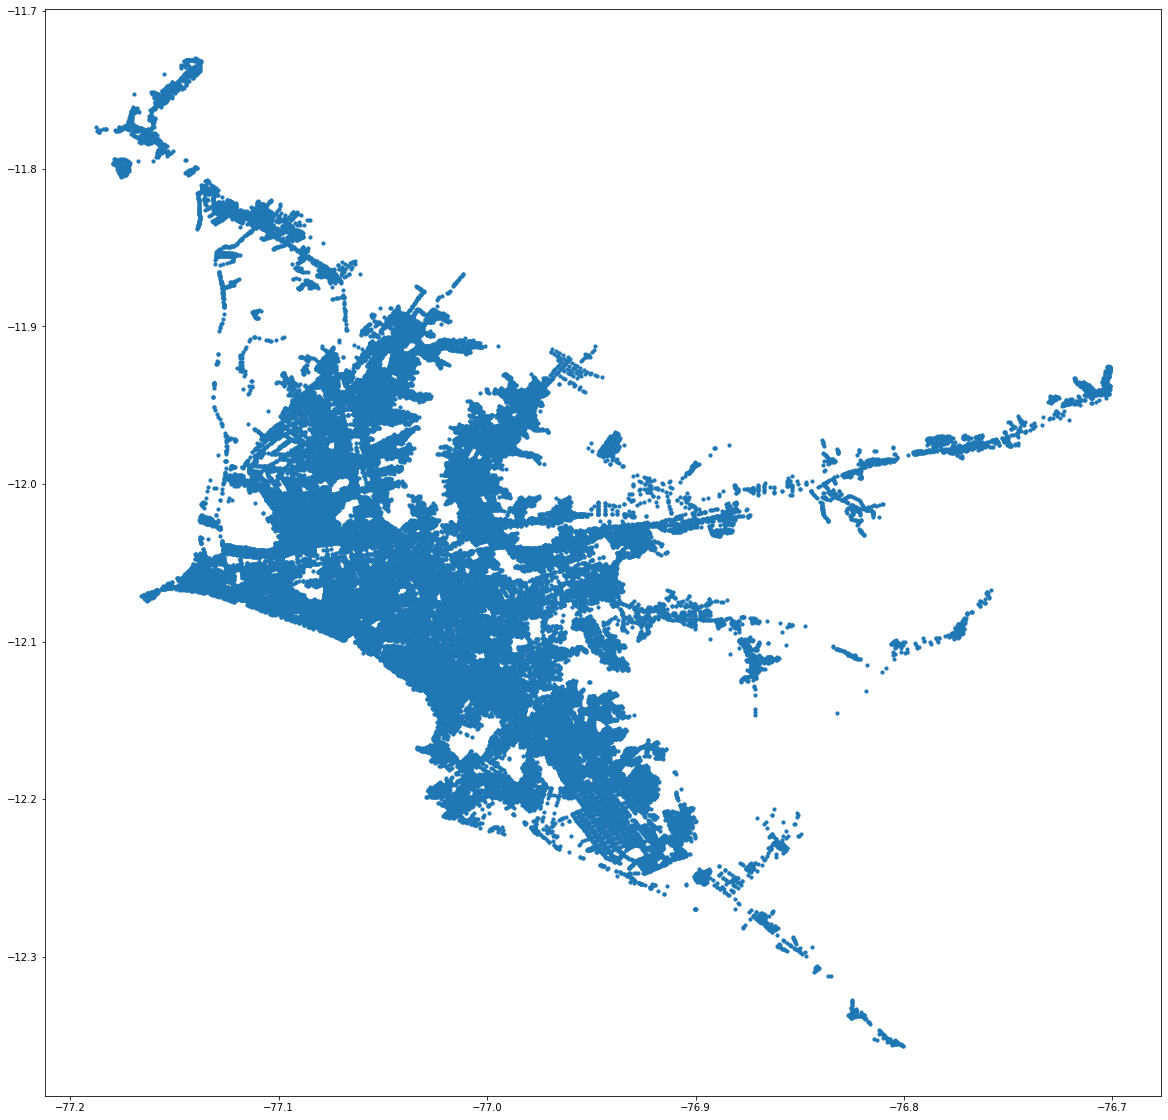

In [ ]:
import matplotlib.pyplot as plt


i=0
# x-axis values
x = []
# y-axis values
y = []
a=0
for key in adj1:
  for item in adj1[key]:
    if a<=6:
      if is_integer_num(item)==False:
        if a==0 or a ==2:
          x.append(item)
          
        if a==1 or a==3:
          y.append(item)
        
      a+=1
  a=0



# plotting points as a scatter plot
plt.figure(figsize=(20,20))
                
plt.scatter(x, y,10)
#plt.plot(x,y)

# function to show the plot
plt.show()


Comprobar que se conectan los nodos (probar pocos datos que se demora en ejecutar)

In [ ]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
  
# Driver code
plt.figure(figsize=(20,20))
G = GraphVisualization()
for key in adj1:
  for item in adj1[key]:
    if is_integer_num(item)==True and item!=0:
      G.addEdge(key,item)

G.visualize()